In [1]:
save_name = 'CustomPneumonia_Oversample_L2_Sum_PosWeight_12_Targets'

In [2]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks\ModelRuns
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [3]:
from modules.lib.StandardTraining import *
from modules.models.CustomPneumonia import CustomPneumoniaNN

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [4]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')


Working on device=cuda


In [5]:
out_channels=12
net_kwargs = {'out_channels':out_channels, 'image_size':(224,224)}
net = CustomPneumoniaNN(**net_kwargs)

net = nn.DataParallel(net)
net.to(device)

summary(net, (1, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 512, 224, 224]          13,312
       BatchNorm2d-2        [-1, 512, 224, 224]           1,024
         MaxPool2d-3        [-1, 512, 112, 112]               0
            Conv2d-4        [-1, 256, 112, 112]       1,179,904
       BatchNorm2d-5        [-1, 256, 112, 112]             512
         MaxPool2d-6          [-1, 256, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]         147,520
       BatchNorm2d-8           [-1, 64, 56, 56]             128
         MaxPool2d-9           [-1, 64, 28, 28]               0
           Linear-10                 [-1, 1024]      51,381,248
          Dropout-11                 [-1, 1024]               0
           Linear-12                  [-1, 512]         524,800
          Dropout-13                  [-1, 512]               0
           Linear-14                   

In [6]:
standardTraining = StandardTraining(number_images=0, 
                                     batch_size=8, 
                                     learning_rate=1e-5, 
                                     num_epochs=2,
                                     device=device, 
                                     net=net,
                                     image_width = 224, #Model more memory consuming so pare down size
                                     image_height = 224,
                                     use_positivity_weights=True,
                                     observation_min_count=150,
                                     loss_reduction='sum',
                                     l2_reg=1e-1,
                                     augPercent=.4,
                                     save_path= f'notebooks/ModelRuns/saved/{save_name}/',
                                     net_name = 'CustomPneumoniaNN',
                                     net_kwargs = net_kwargs)

Total Oversampled Rows Added to Train: 76,441

Number of Training Images: 182,006
Number of Validation Images: 26,183

Positive Weights used in BCEWithLogitsLoss:


Enlarged_Cardiomediastinum    5.407308
Cardiomegaly                  3.645025
Lung_Opacity                  1.042143
Lung_Lesion                   5.692873
Edema                         2.583854
Consolidation                 4.938206
Pneumonia                     8.429386
Atelectasis                   3.197846
Pneumothorax                  5.476621
Pleural_Effusion              1.515528
Pleural_Other                 9.950364
Fracture                      6.176327
dtype: float64

In [7]:
standardTraining.train()

▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [1/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 2097024.6278         
Time of Completion: 2020-08-03 10:13:23.584602          
Training Duration: 1:08:11.143213          
Validation Duration: 0:04:15.106460

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,39183,73339,0.659904,0.352568,0.459590,0.731686,0.459477
4,Edema,50785,86306,0.723127,0.425509,0.535761,0.736129,0.493492
5,Consolidation,30650,75535,0.657814,0.266923,0.379752,0.711107,0.383631
7,Atelectasis,43357,85725,0.587633,0.297206,0.394757,0.616018,0.344585
9,Pleural_Effusion,72353,88249,0.638412,0.523417,0.575223,0.679050,0.572688



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2969,8082,0.645335,0.237070,0.346756,0.758198,0.301494
4,Edema,5972,12192,0.766912,0.375656,0.504294,0.763891,0.451145
5,Consolidation,1586,5113,0.329760,0.102288,0.156143,0.633252,0.096071
7,Atelectasis,4050,10628,0.500000,0.190534,0.275923,0.586782,0.193593
9,Pleural_Effusion,8938,10726,0.664578,0.553795,0.604150,0.763210,0.602987


▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃
Epoch [2/2]
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔
Epoch Loss: 1656992.8712         
Time of Completion: 2020-08-03 11:25:49.009278          
Training Duration: 1:08:09.514318          
Validation Duration: 0:04:14.030387

TRAINING

▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,39183,61070,0.753158,0.483232,0.588731,0.847545,0.672036
4,Edema,50785,77342,0.765285,0.502508,0.606664,0.813796,0.622838
5,Consolidation,30650,55261,0.728124,0.403847,0.519538,0.837029,0.643270
7,Atelectasis,43357,73366,0.649468,0.383815,0.482493,0.734896,0.536022
9,Pleural_Effusion,72353,84671,0.705334,0.602721,0.650003,0.771460,0.694077



VALIDATION

▔▔▔▔▔▔▔


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,2969,5603,0.546312,0.289488,0.378441,0.775412,0.326751
4,Edema,5972,8802,0.633121,0.429561,0.511845,0.771009,0.468818
5,Consolidation,1586,5092,0.337327,0.105067,0.160228,0.638581,0.097182
7,Atelectasis,4050,7317,0.374568,0.207325,0.266913,0.602196,0.199164
9,Pleural_Effusion,8938,9722,0.640635,0.588973,0.613719,0.780891,0.628374


Training Duration: 2:24:53.485528



TRAINING

▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.073860
Hamming Loss,0.239545
Hamming Accuracy,0.760455
Combined Recall,0.571696
Combined Precision,0.408698
Combined F1,0.449596


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,28406,50662,0.710765,0.398524,0.510700,0.834696,0.643181
1,Cardiomegaly,39183,61070,0.753158,0.483232,0.588731,0.847545,0.672036
2,Lung_Opacity,89125,92769,0.613374,0.589281,0.601086,0.646163,0.631082
3,Lung_Lesion,27194,49503,0.751820,0.413005,0.533137,0.865355,0.678191
4,Edema,50785,77342,0.765285,0.502508,0.606664,0.813796,0.622838
5,Consolidation,30650,55261,0.728124,0.403847,0.519538,0.837029,0.643270
6,Pneumonia,19302,41677,0.775515,0.359167,0.490956,0.886103,0.680627
7,Atelectasis,43357,73366,0.649468,0.383815,0.482493,0.734896,0.536022
8,Pneumothorax,28102,54844,0.740019,0.379185,0.501435,0.843132,0.614934
9,Pleural_Effusion,72353,84671,0.705334,0.602721,0.650003,0.771460,0.694077


***** ROC *****


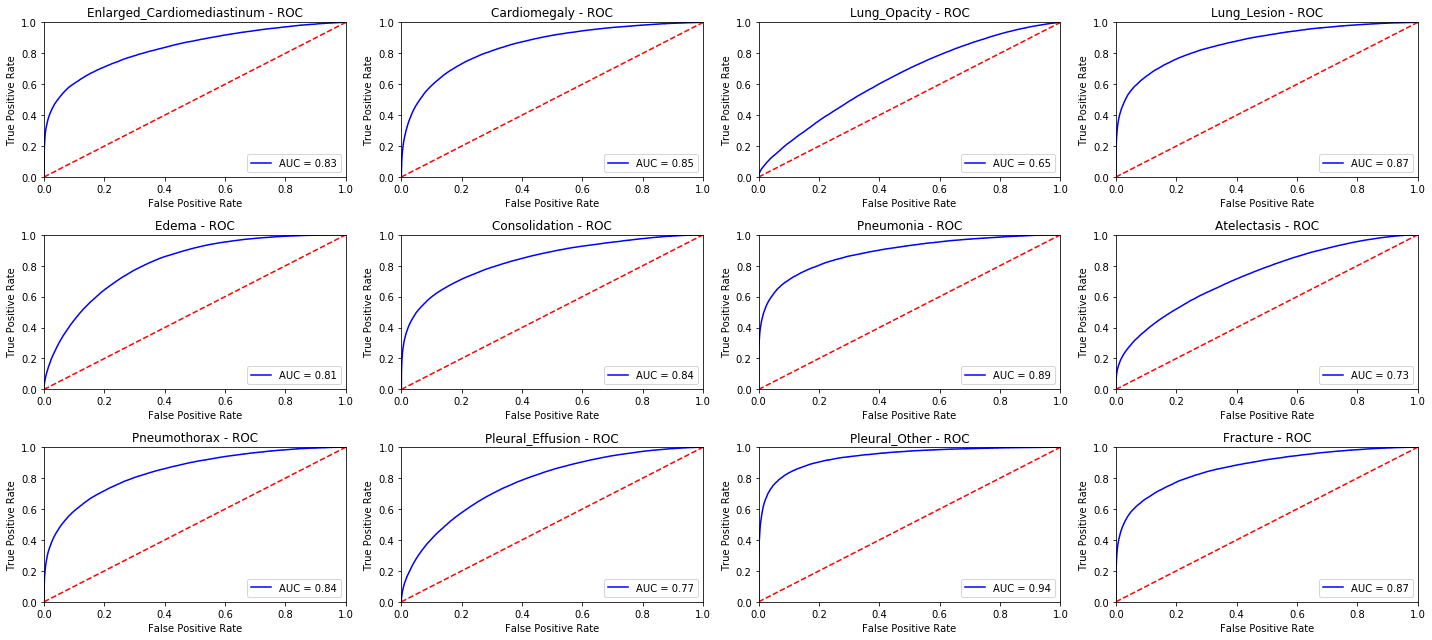

***** Precision / Recall *****


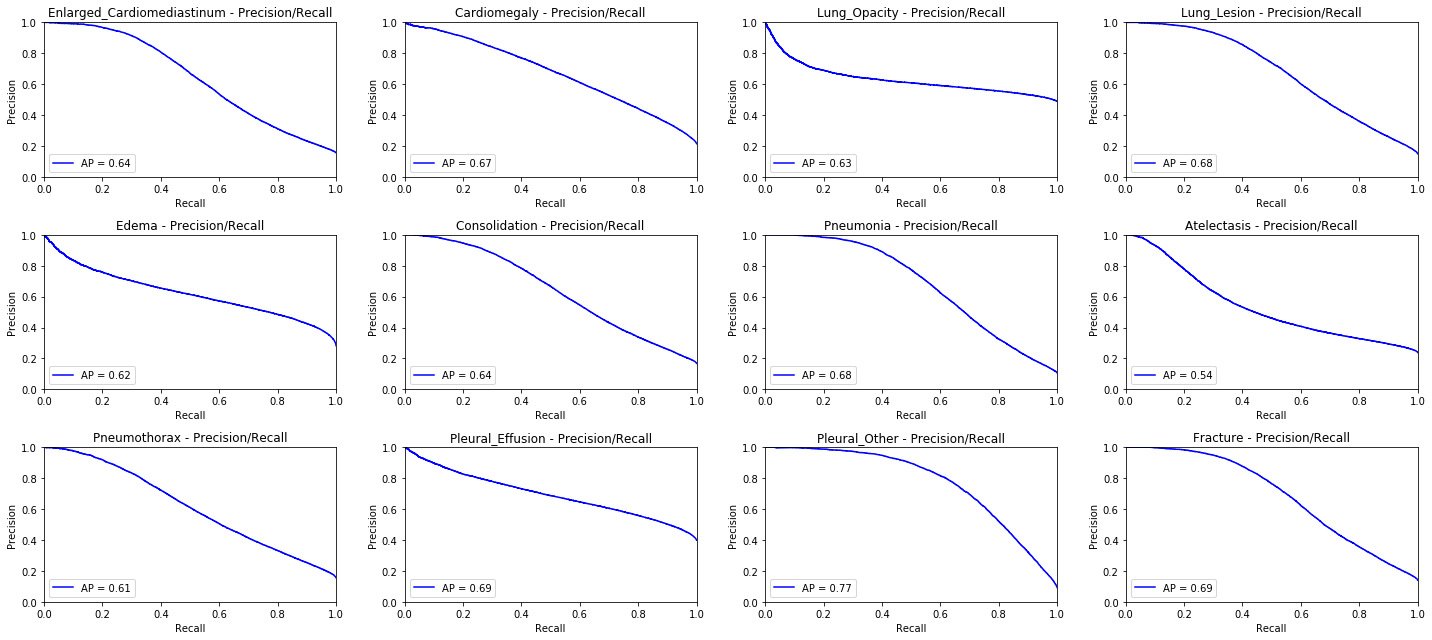


VALIDATION

▔▔▔▔▔▔▔


,Score for all Targets
Accuracy Score,0.082153
Hamming Loss,0.205891
Hamming Accuracy,0.794109
Combined Recall,0.389693
Combined Precision,0.252355
Combined F1,0.282331


,Target,True Positives,Predicted Positives,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,1352,1587,0.153846,0.131065,0.141545,0.619803,0.091224
1,Cardiomegaly,2969,5603,0.546312,0.289488,0.378441,0.775412,0.326751
2,Lung_Opacity,11975,10904,0.542213,0.595470,0.567595,0.669105,0.592660
3,Lung_Lesion,1131,4319,0.310345,0.081269,0.128807,0.664329,0.076379
4,Edema,5972,8802,0.633121,0.429561,0.511845,0.771009,0.468818
5,Consolidation,1586,5092,0.337327,0.105067,0.160228,0.638581,0.097182
6,Pneumonia,677,4376,0.332349,0.051417,0.089056,0.635368,0.044924
7,Atelectasis,4050,7317,0.374568,0.207325,0.266913,0.602196,0.199164
8,Pneumothorax,2132,5015,0.456379,0.194018,0.272282,0.724370,0.200717
9,Pleural_Effusion,8938,9722,0.640635,0.588973,0.613719,0.780891,0.628374


***** ROC *****


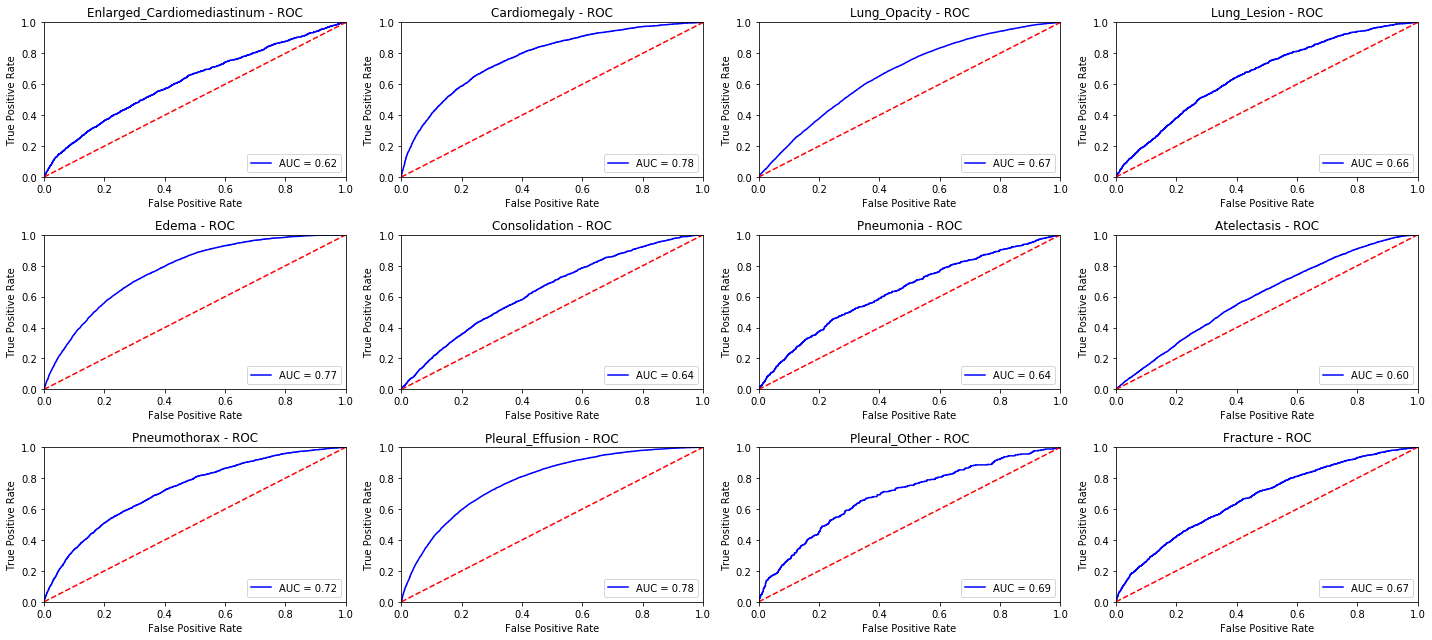

***** Precision / Recall *****


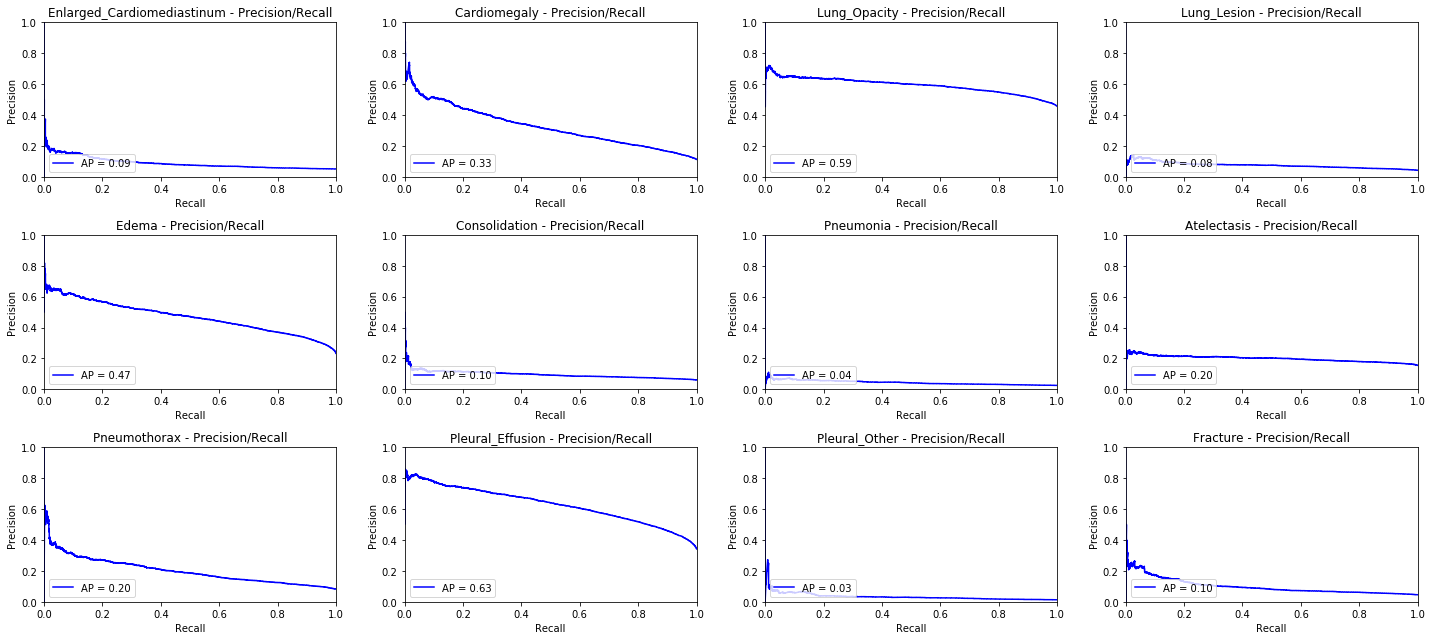

In [8]:
standardTraining.displayMetrics()

In [9]:
standardTraining.save()